# Radial Velocity Correction

Be careful with the fact that the date/hours recorded in the HDF file can be different than the real hours when the cube has been taken at least because there is only one date recorded in the HDF5 file but your data may have been taken over multiple nights at different hours. Is is possible to get a more precise radial velocity correction from the exact moment when each individual image of the data cube has been recorded.

In [1]:
import orcs.process

In [2]:
cube = orcs.process.SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

master.03e73|INFO| Cube is level 3
master.03e73|INFO| shape: (2048, 2064, 840)
master.03e73|INFO| wavenumber calibration: True
master.03e73|INFO| flux calibration: True
master.03e73|INFO| wcs calibration: True


## Print default barycentric radial velocity correction 

In [3]:
corr = cube.get_radial_velocity_correction(kind='barycentric')
print('Barycentric velocity correction: {:.2f} km/s'.format(corr))

master.03e73|INFO| Observation date: 2016-08-25T00:00:00.000 = 2457625.5 Julian days
master.03e73|INFO| Observatory location: LAT 19.825231999999996 deg |LON -155.46876099999997 deg |ALT 4214.999999999996 m
master.03e73|INFO| Observed Target: 00h42m44.3572s +41d16m07.8713s


Barycentric velocity correction: 20.13 km/s


## Use more precise dates
Here we have created a file (`abell426.dates.list`) which records all the dates at which the individual files have been taken (as supplied by the keyword DATE of each individual FITS file).

```
~/data/1867004o.fits 2016-01-10T05:06:02
~/data/1867005o.fits 2016-01-10T05:06:32
~/data/1867006o.fits 2016-01-10T05:07:03
~/data/1867007o.fits 2016-01-10T05:07:33
~/data/1867008o.fits 2016-01-10T05:08:06
~/data/1867009o.fits 2016-01-10T05:08:36
~/data/1867010o.fits 2016-01-10T05:09:06
~/data/1867011o.fits 2016-01-10T05:09:36
~/data/1867012o.fits 2016-01-10T05:10:08
~/data/1867013o.fits 2016-01-10T05:10:39
~/data/1867014o.fits 2016-01-10T05:11:09
~/data/1867015o.fits 2016-01-10T05:11:40
~/data/1867016o.fits 2016-01-10T05:12:11
~/data/1867017o.fits 2016-01-10T05:12:42
...
```


In [5]:
# The results of the radial velocity correction for 
# each individual file of the initial inteferometric 
# cube are recorded here
fout = open('abell426.barycorr.list', 'w') 

# we loop in the dates file
with open('abell426.dates.list', 'r') as f:
    for line in f:
        date = line.split()[1]
        
        corr = cube.get_radial_velocity_correction(
            kind='barycentric', date=date, silent=True)
        
        fout.write('{} {}\n'.format(date, corr))
        print(date, corr)

2016-01-10T05:06:02 -25.108024947940848
2016-01-10T05:06:32 -25.10872665532921
2016-01-10T05:07:03 -25.10945122668723
2016-01-10T05:07:33 -25.110151840441453
2016-01-10T05:08:06 -25.110921992491928
2016-01-10T05:08:36 -25.111621499831095
2016-01-10T05:09:06 -25.1123204739662
2016-01-10T05:09:36 -25.113018931539077
2016-01-10T05:10:08 -25.11376331911631
2016-01-10T05:10:39 -25.114483922797103
2016-01-10T05:11:09 -25.115180639934692
2016-01-10T05:11:40 -25.11590001158794
2016-01-10T05:12:11 -25.116618782071917
2016-01-10T05:12:42 -25.11733703466232
2016-01-10T05:13:12 -25.118031506152114
2016-01-10T05:13:43 -25.118748483745776
2016-01-10T05:14:14 -25.119464883635143
2016-01-10T05:14:45 -25.120180669374616
2016-01-10T05:15:15 -25.120872792004022
2016-01-10T05:15:45 -25.12156431299819
2016-01-10T05:16:18 -25.122324275692225
2016-01-10T05:16:48 -25.123014603733846
2016-01-10T05:17:19 -25.12372731659372
2016-01-10T05:17:49 -25.124416398329103
2016-01-10T05:18:20 -25.125127811096363
2016-01-1

## output
File `abell426.barycorr.list` has been created with the previous code.

```
2016-01-10T05:06:02 -21.4663846704
2016-01-10T05:06:32 -21.4671673847
2016-01-10T05:07:03 -21.4679767479
2016-01-10T05:07:33 -21.4687605397
2016-01-10T05:08:06 -21.4696233171
2016-01-10T05:08:36 -21.4704082077
2016-01-10T05:09:06 -21.4711936166
2016-01-10T05:09:36 -21.4719795406
2016-01-10T05:10:08 -21.4728184234
2016-01-10T05:10:39 -21.4736316427
2016-01-10T05:11:09 -21.4744191425
2016-01-10T05:11:40 -21.4752334194
2016-01-10T05:12:11 -21.4760482283
2016-01-10T05:12:42 -21.4768635658
2016-01-10T05:13:12 -21.4776531019
2016-01-10T05:13:43 -21.4784694689
2016-01-10T05:14:14 -21.4792863537
2016-01-10T05:14:45 -21.4801037528
2016-01-10T05:15:15 -21.4808952705
2016-01-10T05:15:45 -21.4816872631
2016-01-10T05:16:18 -21.4825589996
...
```

master.03e73|WARNING| /home/thomas/miniconda2/envs/orb3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)



Text(0, 0.5, 'Barycentric velocity correction (in km/s)')

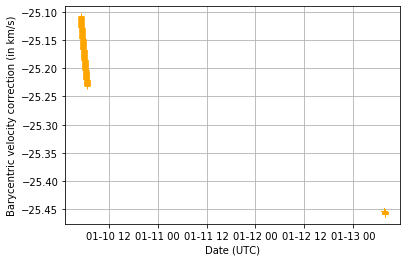

In [6]:
# Now, we can then display the output file, 
# i.e. the barycentric velocity correction

import astropy.time

dates = list() ; corrs = list()
with open('abell426.barycorr.list', 'r') as f:
    for line in f:
        line = line.split()
        dates.append(line[0])
        corrs.append(float(line[1]))

dates = astropy.time.Time(dates, format='isot', scale='utc')
        
import pylab as pl
pl.plot_date(dates.plot_date, corrs, ls='None', marker='+', c='orange')
pl.grid()
pl.xlabel('Date (UTC)')
pl.ylabel('Barycentric velocity correction (in km/s)')

# How to use the computed correction

In general, for km/s precision, just add the barycentric velocity to the measured velocity. For higher precision you can refer to http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.radial_velocity_correction